In [96]:
import pandas as pd
import numpy as np

In [97]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [98]:
df=pd.read_excel("Data_Train.xlsx")

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Exploratory data analysis

## Here we separated hours and minutes by using regular expression!!!!

In [100]:
df[["Dhours","Dminutes"]]=df["Duration"].str.extract(r'(?:(\d+)h)?\s*(?:(\d*)m)?')

In [101]:
df[["Dhours","Dminutes"]]=df[["Dhours","Dminutes"]].apply(pd.to_numeric,errors='coerce')

In [102]:
df[["Dhours","Dminutes"]]=df[["Dhours","Dminutes"]].fillna(0)

In [103]:
df[["Dhours","Dminutes"]]=df[["Dhours","Dminutes"]].astype(int)

In [104]:
df=df.drop(["Duration","Additional_Info"],axis=1)

In [105]:
df["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [106]:
df["Total_Stops"]=df["Total_Stops"].replace('non-stop','0')

In [107]:
df["Total_Stops"]=df["Total_Stops"].str.split().str[0]

In [108]:
df[df["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Dhours,Dminutes
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,NaN,7480,23,40


In [109]:
df["Total_Stops"]=df["Total_Stops"].fillna(2)


In [110]:
df["Total_Stops"]=df["Total_Stops"].astype(int)

In [111]:
df["Dminutes"]=df["Dhours"]*60+df["Dminutes"]

In [112]:
df=df.drop("Dhours",axis=1)

<Axes: xlabel='Price', ylabel='Total_Stops'>

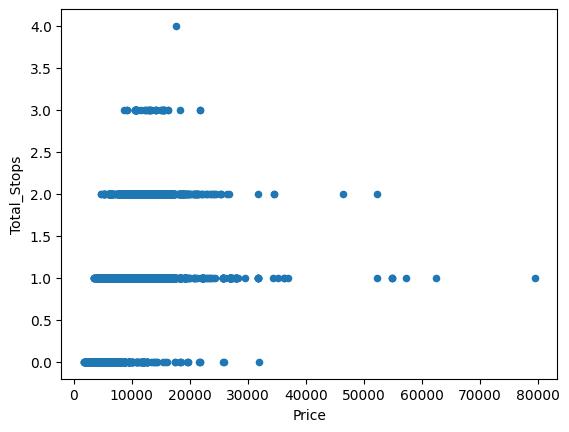

In [113]:
df.plot(kind="scatter",x="Price",y="Total_Stops")

In [114]:
df["Journey_date"]=pd.to_datetime(df["Date_of_Journey"],format='%d/%m/%Y').dt.day

In [115]:
df["Journey_month"]=pd.to_datetime(df["Date_of_Journey"],format='%d/%m/%Y').dt.month

In [116]:
df=df.drop("Date_of_Journey",axis=1)

In [117]:
df["Dep_Time"]=df["Dep_Time"].str.replace(":"," ")

In [118]:
df["deph"]=df["Dep_Time"].str.split().str[0]

In [119]:
df["depm"]=df["Dep_Time"].str.split().str[1]

In [120]:
df["Arrival_Time"]=df["Arrival_Time"].str.split().str[0]

In [121]:
df["Arrival_Time"]=df["Arrival_Time"].str.replace(":"," ")

In [122]:
df["Arrivalh"]=df["Arrival_Time"].str.split().str[0]

In [123]:
df["Arrivalm"]=df["Arrival_Time"].str.split().str[1]

In [124]:
df=df.drop(["Dep_Time","Arrival_Time"],axis=1)

In [125]:
df=df.drop("Route",axis=1)

In [126]:
df["deph"]=df["deph"].astype(int)

In [127]:
df["depm"]=df["depm"].astype(int)

In [128]:
df["Arrivalh"]=df["Arrivalh"].astype(int)

In [129]:
df["Arrivalm"]=df["Arrivalm"].astype(int)

In [130]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

### Encoding categorical Variable by using ONEHOTENCODER

In [131]:
column=ColumnTransformer([
    ("column",OneHotEncoder(sparse_output=False,drop="first"),["Airline","Source","Destination"])
],remainder='passthrough')

In [132]:
x=df.loc[:,df.columns!='Price']

In [133]:
x

,Airline,Source,Destination,Total_Stops,Dminutes,Journey_date,Journey_month,deph,depm,Arrivalh,Arrivalm
0,IndiGo,Banglore,New Delhi,0,170,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2,445,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,1140,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,325,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,285,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,150,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,0,155,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,0,180,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,0,160,1,3,11,30,14,10


In [134]:
y=df.iloc[:,-8]

In [135]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

### Spliting Dataset into train and test for validation of model

In [136]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

### Using Regression models

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

In [138]:
pipe=Pipeline(steps=[
    ("step1",column),
    ("regressor", RandomForestRegressor())
    ])

In [139]:
pipe2=Pipeline(steps=[
    ("step1",column),
    ("regressor", LinearRegression())
    ])

In [140]:
pipe.fit(x_train,y_train) # for randomforest
pipe2.fit(x_train,y_train) # for linearregression

C:\Users\HPW\AppData\Roaming\Python\Python311\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('column',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Airline', 'Source',
                                                   'Destination'])])),
                ('regressor', LinearRegression())])

In [141]:
x_test=x_test[x_test["Airline"]!="Trujet"]

In [142]:
y_test=y_test.drop(2878)

In [144]:
y_pred=pipe.predict(x_test) # for RandomForest
y_pred2=pipe2.predict(x_test) # for Linearregression

### Metrics for evaluation

In [145]:
from sklearn.metrics import r2_score

In [146]:
print("Randomforest score:",pipe.score(x_test,y_test))
print("Linear Regression score:",pipe2.score(x_test,y_test))

Randomforest score: 0.8044149924723756
Linear Regression score: 0.608669632001742


In [147]:
print("Randomforest r2 score:",r2_score(y_pred,y_test))
print("Linear regression r2 score:",r2_score(y_pred2,y_test))

Randomforest r2 score: 0.7781302603721276
Linear regression r2 score: 0.4343287926185755


In [148]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [149]:
print("Randomforest mean absolute error:",mean_absolute_error(y_pred,y_test))
print("Linear regression mean absolute error:",mean_absolute_error(y_pred2,y_test))

Randomforest mean absolute error: 1189.4637005296947
Linear regression mean absolute error: 1960.7896015060508


In [150]:
print("Randomforest mean squared error:",mean_squared_error(y_pred,y_test))
print("Linear regression mean squared error:",mean_squared_error(y_pred2,y_test))

Randomforest mean squared error: 3930513.992692759
Linear regression mean squared error: 7864250.469021837


In [151]:
columns = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Dminutes', 'Journey_month', 'deph', 'depm', 'Arrivalh', 'Arrivalm', 'Journey_date']

# Creating a DataFrame with the same structure as the training data
input_data = {
    'Airline': ['SpiceJet'],
    'Source': ['Kolkata'],
    'Destination': ['Banglore'],
    'Total_Stops': [0],
    'Dminutes': [150],
    'Journey_month': [3],
    'deph': ['09'],
    'depm': ['00'],
    'Arrivalh': ['11'],
    'Arrivalm': ['30'],
    'Journey_date': [3]
}

input_df = pd.DataFrame(input_data, columns=columns)

In [152]:
print("Randomforest output",pipe.predict(input_df))
print("Linear regression output",pipe2.predict(input_df))


Randomforest output [5513.32]
Linear regression output [5495.27373515]


### pickling trained model file

In [153]:
import pickle

In [154]:
pickle.dump(pipe,open("main.pkl","wb"))

In [95]:
import sklearn
print(sklearn.__version__)

1.5.0
